In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "../s0a_prepData_Ln/db_Ln_full.xlsx"
df = pd.read_excel(file_path, header=1)

In [3]:
print("All entries count: ", df.shape[0])
print("Unique extractant count: ", len(set(df['SMILES'])))

All entries count:  5086
Unique extractant count:  261


## Analyze the metal

In [4]:
print("Unique metal count: ", len(set(df['Metal'])))

Unique metal count:  15


In [5]:
df['Metal_noOx'] = df['Metal'].str.replace(r'\(.*\)', '', regex=True)

In [6]:
metal_counts_sort_series = df['Metal_noOx'].value_counts()
metal_counts_sort_series

Metal_noOx
Eu    1164
Ce     390
Dy     376
Nd     356
La     342
Pr     333
Sm     327
Gd     324
Er     299
Ho     254
Tb     244
Lu     241
Yb     235
Tm     200
Pm       1
Name: count, dtype: int64

In [7]:
Ln_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
metal_counts_pTableOrder = pd.Series(data=metal_counts_sort_series, index=Ln_list)
metal_counts_pTableOrder

La     342
Ce     390
Pr     333
Nd     356
Pm       1
Sm     327
Eu    1164
Gd     324
Tb     244
Dy     376
Ho     254
Er     299
Tm     200
Yb     235
Lu     241
Name: count, dtype: int64

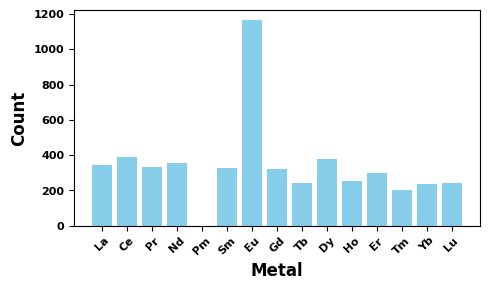

In [8]:
plt.figure(figsize=(5, 3))
plt.bar(metal_counts_pTableOrder.index, metal_counts_pTableOrder.values, color='skyblue')
plt.xlabel('Metal', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

## Analyze the log D

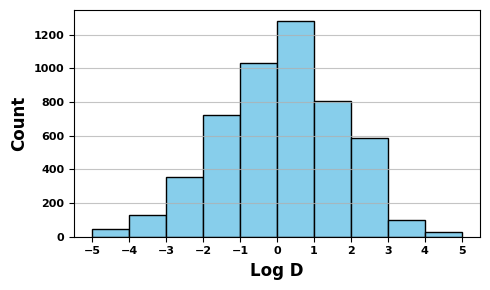

In [9]:
bins = np.arange(-5, 6, 1)

plt.figure(figsize=(5, 3))
plt.hist(df['Log_D'], bins=bins, edgecolor='black', color='skyblue')
plt.xlabel('Log D', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(bins, fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Analyze the solvents

In [10]:
print("Unique solvent A count: ", len(set(df['Solvent_A'])))
print("Unique solvent B count: ", len(set(df['Solvent_B'].dropna())))
print("Unique solvent A+B count: ", len(set(pd.concat([df['Solvent_A'],df['Solvent_B']]).dropna())))

Unique solvent A count:  41
Unique solvent B count:  6
Unique solvent A+B count:  44


In [11]:
solvent_series = pd.concat([df['Solvent_A'],df['Solvent_B']]).dropna()

solvent_counts_sort_series = solvent_series.value_counts()
solvent_counts_sort_series

n-dodecane                        1417
1-octanol                         1032
kerosene                           679
Exxal 13                           481
Isopar L                           481
toluene                            459
hydrogenated tetrapropylene        262
chloroform                         190
CH3Cl                              140
tert-butylbenzene                  120
nitrobenzene                       115
meta-nitrobenzotrifluoride         110
1,4-diisopropylbenzene             102
Decalin                            100
Tetrachloroethylene                 84
Dichloromethane                     79
n-octane                            75
tetrachloroethane                   73
sulfonated kerosene                 66
1,2-dichloroethane                  57
phenyl trifluoromethyl sulfone      42
cyclohexanone                       42
[C4mim][Tf2N]                       28
iso-decanol                         22
DMSO                                20
2-nitrophenyl hexyl ether